<div style="display: table; width: 100%;">
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 70%;">
    <h1>Herramientas para Data Science</h1>
  </div>
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 30%;">
    <img src="https://github.com/UIDE-Tareas/6-Herramientas-Data-Science-Tarea1/blob/main/Assets/UideLogo.png?raw=true" alt="logo UIDE" style="width:50%;">
  </div>
</div>
<hr />

### 🟦 Componente Práctico 1  
🟡 Grupo: 3      
🟡 Semana: 1      
🟡 Docente:  Ing. Iván García S., PhD. (idgs78@hotmail.com)     

### 🟦 Realizado por:   
Estudiantes

💻 Evelin Rosero Ordoñez   

💻 Marjorie Muso Tandalla

💻 José Espinoza Bone

### 🟦 Objetivo y alcance del trabajo 
- Esta práctica tiene el objetivo de realizar un preprocesamiento de datos y un Análisis 
exploratorio de datos (estadísticas y visualización) de las variables más relevantes 
que considere para el propósito de predicción de supervivencia en el desastre del Titanic. Al finalizar la 
práctica, los maestrantes podrán manipular adecuadamente un dataset de datos 
estructurados (alfanuméricos). [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)


### 🟦 [Código fuente original](https://github.com/UIDE-Tareas/6-Herramientas-Data-Science-Tarea1.git)
Con [git](https://git-scm.com/) instalado. En Windows, Linux o MacOS ejecutar el comando.

```
git clone "https://github.com/UIDE-Tareas/6-Herramientas-Data-Science-Tarea1.git"
```






# 0️⃣ Preparar entorno

Funciones base para utilizar si son requeridas en el presente notebook. Adicional hay funciones utilitarias para utilizar con pandas.DataFrame y finalmente las funciones para cumplir con los objetivos del presente trabajo práctico.

In [1]:
# UTILIDADES PARA GESTIÓN DE DEPENDENCIAS E INFORMACIÓN DEL ENTORNO

import sys
import subprocess
import os
from pathlib import Path
from enum import Enum
import zipfile
from typing import Optional
from typing import Iterable
from dataclasses import dataclass
from typing import cast
from typing import Tuple
from types import SimpleNamespace
from typing import Any
from typing import Protocol
from typing import Literal
from typing import Sequence

# Libs a instalar
LIBS = [
    "numpy",
    "pandas",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "requests",
    "wcwidth",
]

class ConsoleColor(Enum):
    RED = "\033[91m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    BLUE = "\033[94m"
    MAGENTA = "\033[95m"
    CYAN = "\033[96m"
    WHITE = "\033[97m"
    RESET = "\033[0m"


def PrintColor(message: str, color: ConsoleColor) -> str:
    RESET = ConsoleColor.RESET.value
    return f"{color.value}{message}{RESET}"


def ShowMessage(
    message: str, title: str, icon: str, color: ConsoleColor, end: str = "\n"
):
    colored_title = PrintColor(icon + f"  " + title.upper() + ":", color)
    print(f"{colored_title} {message}", end=end)


def ShowInfoMessage(
    message: str, title: str = "Info", icon: str = "ℹ️", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.CYAN, end)


def ShowSuccessMessage(
    message: str, title: str = "Success", icon: str = "✅", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.GREEN, end)


def ShowErrorMessage(
    message: str, title: str = "Error", icon: str = "❌", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.RED, end)


def ShowWarningMessage(
    message: str, title: str = "Warning", icon: str = "⚠️", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.YELLOW, end)


# Funcion para ejecutar comandos
def RunCommand(
    commandList: list[str], printCommand: bool = True, printError: bool = True
) -> subprocess.CompletedProcess[str]:
    print("⏳", " ".join(commandList))

    if printCommand:
        proc = subprocess.Popen(
            commandList,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            bufsize=1,
            universal_newlines=True,
        )

        out_lines: list[str] = []
        assert proc.stdout is not None
        for line in proc.stdout:
            print(line, end="")
            out_lines.append(line)

        proc.wait()
        err_text = ""
        if proc.stderr is not None:
            err_text = proc.stderr.read() or ""

        if proc.returncode != 0 and printError and err_text:
            ShowErrorMessage(err_text, "", end="")
            # print(err_text, end="")

        return subprocess.CompletedProcess(
            args=commandList,
            returncode=proc.returncode,
            stdout="".join(out_lines),
            stderr=err_text,
        )

    else:
        result = subprocess.run(
            commandList, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True
        )
        if result.returncode != 0 and printError and result.stderr:
            ShowErrorMessage(result.stderr, "", end="")
            # print(result.stderr, end="")
        return result


# Función para instalar las dependencias
def InstallDeps(libs: Optional[list[str]] = None):
    print("ℹ️ Installing deps.")
    printCommand = False
    printError = True
    RunCommand(
        [sys.executable, "-m", "pip", "install", "--upgrade", "pip"],
        printCommand=printCommand,
        printError=printError,
    )
    if libs is None or libs.count == 0:
        print("No hay elementos a instalar.")
    else:
        RunCommand(
            [sys.executable, "-m", "pip", "install", *libs],
            printCommand=printCommand,
            printError=printError,
        )
        print("Deps installed.")
    print()


# Función para mostrar info el ambiente de ejecución
def ShowEnvironmentInfo():
    print("ℹ️  Environment Info:")
    print("Python Version:", sys.version)
    print("Platform:", sys.platform)
    print("Executable Path:", sys.executable)
    print("Current Working Directory:", os.getcwd())
    print("VIRTUAL_ENV:", os.environ.get("VIRTUAL_ENV"))
    print("sys.prefix:", sys.prefix)
    print("sys.base_prefix:", sys.base_prefix)
    print()


InstallDeps(LIBS)
ShowEnvironmentInfo()
import requests


@dataclass(frozen=True)
class BoxStyle:
    TL: str
    TR: str
    BL: str
    BR: str
    H: str
    V: str

class TitleBoxLineStyle(Enum):
    SIMPLE = BoxStyle("┌", "┐", "└", "┘", "─", "│")
    DOUBLE = BoxStyle("╔", "╗", "╚", "╝", "═", "║")
    ROUNDED = BoxStyle("╭", "╮", "╰", "╯", "─", "│")
    HEAVY = BoxStyle("┏", "┓", "┗", "┛", "━", "┃")
    ASCII = BoxStyle("+", "+", "+", "+", "-", "|")
    DOUBLE_BOLD = BoxStyle("╔", "╗", "╚", "╝", "╬", "║")
    BLOCK = BoxStyle("█", "█", "█", "█", "█", "█")
    HEAVY_CROSS = BoxStyle("╒", "╕", "╘", "╛", "╪", "┃")
    METAL = BoxStyle("╞", "╡", "╘", "╛", "═", "║")


# Función para mostrar un título con recuadro
def ShowTitleBox(
    text: str,
    max_len: int = 100,
    boxLineStyle: TitleBoxLineStyle = TitleBoxLineStyle.SIMPLE,
    color: ConsoleColor = ConsoleColor.CYAN,
):
    try:

        def vislen(s: str) -> int:
            from wcwidth import wcswidth as _w

            n = _w(s)
            return n if n >= 0 else len(s)

    except Exception:

        def vislen(s: str) -> int:
            return len(s)

    pad = 1
    tlen = vislen(text)
    inner = max(max_len, tlen)
    left = (inner - tlen) // 2
    right = inner - tlen - left

    top = f"{boxLineStyle.value.TL}{boxLineStyle.value.H * (inner + 2 * pad)}{boxLineStyle.value.TR}"
    mid = f"{boxLineStyle.value.V}{' ' * pad}{' ' * left}{text}{' ' * right}{' ' * pad}{boxLineStyle.value.V}"
    bot = f"{boxLineStyle.value.BL}{boxLineStyle.value.H * (inner + 2 * pad)}{boxLineStyle.value.BR}"
    print(PrintColor("\n".join([top, mid, bot]), color))


# Función para descargar un archivo
def DownloadFile(uri: str, filename: str, overwrite: bool = False, timeout: int = 20, printInfo: bool = True):
    dest = Path(filename).resolve()
    if dest.exists() and dest.is_file() and dest.stat().st_size > 0 and not overwrite:
        if printInfo:
            print(
                f'✅ Ya existe: "{dest}". No se descarga (use overwrite=True para forzar).'
            )
        return
    if dest.parent and not dest.parent.exists():
        dest.parent.mkdir(parents=True, exist_ok=True)
    if printInfo:
        print(f'ℹ️ Descargando "{uri}" → "{dest}"')
    try:
        with requests.get(uri, stream=True, timeout=timeout) as resp:
            resp.raise_for_status()
            tmp = dest.with_suffix(dest.suffix + ".part")
            with open(tmp, "wb") as f:
                for chunk in resp.iter_content(chunk_size=1024 * 64):
                    if chunk:  # filtra keep-alive chunks
                        f.write(chunk)
            tmp.replace(dest)
        if printInfo: 
            print(f'✅ Archivo "{dest}" descargado exitosamente.')
    except requests.exceptions.RequestException as e:
        print(f"❌ Error al descargar: {e}")


# Función para descomprimir un archivo zip
def UnzipFile(filename: str, outputDir: str):
    print(f'ℹ️ Descomprimiendo "{filename}" en "{outputDir}"')
    try:
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall(outputDir)
        print(f"Descomprimido en: {os.path.abspath(outputDir)}")
    except Exception as e:
        print(f"Error: {e}")


ℹ️ Installing deps.
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install numpy pandas matplotlib seaborn scikit-learn requests wcwidth
Deps installed.

ℹ️  Environment Info:
Python Version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Platform: win32
Executable Path: c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe
Current Working Directory: c:\Users\Megam\OneDrive\Escritorio\6-Herramientas-Data-Science-Tarea1
VIRTUAL_ENV: None
sys.prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313
sys.base_prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313



In [2]:
# UTILIDADES PARA ANÁLISIS Y MANIPULACIÓN DE DATAFRAMES

# Importar libraries
import pandas as pd
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.figure import Figure
from matplotlib.axes import Axes

from pandas import DataFrame
from pandas import Series
from sklearn.utils import Bunch
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)

warnings.filterwarnings("ignore")

# Configurar opciones de Pandas
pd.set_option("display.float_format", "{:.2f}".format)
pandas.set_option("display.max_rows", None)
pandas.set_option("display.max_columns", None)


# Función para mostrar la información del DataFrame.
def ShowDfInfo(df: pandas.DataFrame, title):
    display(f"ℹ️ INFO {title} ℹ️")
    df.info()
    display()


# Función para mostrar las n primeras filas del DataFrame.
def ShowDfHead(df: pandas.DataFrame, title: str, headQty=10):
    display(f"ℹ️ {title}: Primeros {headQty} elementos.")
    display(df.head(headQty))
    display()


# Función para mostrar las n últimas filas del DataFrame.
def ShowDfTail(df: pandas.DataFrame, title: str, tailQty=10):
    display(f"ℹ️ {title}: Últimos {tailQty} elementos.")
    display(df.tail(tailQty))
    display()


# Mostrar el tamaño del DataFrame
def ShowDfShape(df: pandas.DataFrame, title: str):
    display(f"ℹ️ {title} - Tamaño de los datos")
    display(f"{df.shape[0]} filas x {df.shape[1]} columnas")
    display()


# Función para mostrar la estadística descriptiva de todas las columnas del DataFrame, por tipo de dato.
def ShowDfStats(df: pandas.DataFrame, title: str = ""):
    display(f"ℹ️ Estadística descriptiva - {title}")
    numeric_cols = df.select_dtypes(include="number")
    if not numeric_cols.empty:
        display("    🔢 Columnas numéricas".upper())
        numeric_desc = (
            numeric_cols.describe().round(2).T
        )  # Transpuesta para añadir columna
        numeric_desc["var"] = numeric_cols.var(numeric_only=True).round(2)
        display(numeric_desc.T)
    non_numeric_cols = df.select_dtypes(
        include=["boolean", "string", "category", "object"]
    )
    if not non_numeric_cols.empty:
        display("    🔡 Columnas no numéricas".upper())
        non_numeric_desc = non_numeric_cols.describe()
        display(non_numeric_desc)
    datetime_cols = df.select_dtypes(include=["datetime", "datetimetz"])
    if not datetime_cols.empty:
        display("    📅 Columnas fechas".upper())
        datetime_desc = datetime_cols.describe()
        display(datetime_desc)


# Función para mostrar una visión general completa del DataFrame
def ShowFullDfOverview(df, title, headQty=5, tailQty=5):
    ShowDfInfo(df, title)
    ShowDfStats(df, title)
    ShowDfShape(df, title)
    ShowDfHead(df, title, headQty=headQty)
    ShowDfTail(df, title, tailQty=tailQty)


# Función para mostrar los valores nulos o NaN de cada columna en un DataFrame
def ShowDfNanValues(df: pandas.DataFrame, title: str):
    display(f"ℹ️ Contador de valores Nulos - {title}")
    nulls_count = df.isnull().sum()
    nulls_df = nulls_count.reset_index()
    nulls_df.columns = ["Columna", "Cantidad_Nulos"]
    display(nulls_df)
    display()


# Tipos de correlación
class CorrelationType(Enum):
    ALL = "all"
    STRONG = "strong"
    WEAK = "weak"


# Muestra las correlaciones completas, débiles y fuertes.
def ShowDfCorrelation(
    df: pandas.DataFrame,
    title: str,
    fig: Optional[Figure] = None,
    ax: Optional[Axes] = None,
    level: CorrelationType = CorrelationType.ALL,
    umbral: float = 0.6,
    showTable: bool = False,
    figsize: tuple = (8, 6),
    annotate: bool = True,
):
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    display(f"ℹ️ {(title).upper()} - Matriz de Correlación, Type: {level.name}")

    corr = df.select_dtypes(include=["number"]).corr().copy()

    if level == CorrelationType.STRONG:
        corr = corr.where(np.abs(corr) >= umbral)
    elif level == CorrelationType.WEAK:
        corr = corr.where(np.abs(corr) < umbral)
        np.fill_diagonal(corr.values, 1)
    elif level != CorrelationType.ALL:
        raise ValueError(f"Invalid level: {level}")

    cax = ax.matshow(corr, vmin=-1, vmax=1)

    cols = corr.columns
    ax.set_xticks(range(len(cols)))
    ax.set_yticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=90, ha="left")
    ax.set_yticklabels(cols)

    fig.colorbar(cax)

    if annotate:
        for (i, j), value in np.ndenumerate(corr.values):
            if not np.isnan(value):
                ax.text(j, i, f"{value:+.2f}", ha="center", va="center")

    if level == CorrelationType.ALL:
        titulo = "Matriz de correlación completa"
    else:
        titulo = f"Matriz de correlación ({level.name}, umbral={umbral})"

    total_elementos = corr.size
    total_nodiagonal = corr.size - corr.shape[0]
    total_nan = corr.isna().sum().sum()
    total_validos = total_elementos - total_nan - corr.shape[0]

    titulo = (
        f"{titulo}, Total Matriz: {total_nodiagonal}, "
        f"Total válidos: {total_validos} ({((total_validos * 100) / total_nodiagonal):.2f}%)"
    )

    ax.set_title(titulo, pad=20)
    ax.grid(False)
    plt.tight_layout()
    plt.show()

    if showTable:
        display(corr)
    fig.show()
    return fig, corr


def NormalizeColumnNames(df: pandas.DataFrame) -> pandas.DataFrame:
    df.columns = [
        col.strip().title().replace(" ", "").replace("_", "") for col in df.columns
    ]
    return df


def DropColumns(
    df: pandas.DataFrame, toDrop: list[str], inplace: bool = False
) -> pandas.DataFrame:
    if not toDrop:
        return df
    if inplace:
        df.drop(columns=df.columns.intersection(toDrop), inplace=True)
        return df
    else:
        return df.drop(columns=df.columns.intersection(toDrop))


# Para almacenar los datos del dataset
@dataclass
class Dataset:
    X: pandas.DataFrame
    y: pandas.DataFrame


# Para almacenar los datos de split del dataset.
@dataclass
class DatasetSplit:
    Train: Dataset
    Test: Dataset


# Muestra el head de cada componente del split.
def ShowDatasetSplitHead(split: DatasetSplit, title: str, headQty: int = 5):
    ShowDfHead(split.Train.X, f"{title} - X Train", headQty)
    ShowDfHead(split.Train.y, f"{title} - y Train", headQty)
    ShowDfHead(split.Test.X, f"{title} - X Test", headQty)
    ShowDfHead(split.Test.y, f"{title} - y Test", headQty)


# Muestra la información del Dataset
def ShowDatasetInfo(data: Dataset, title):
    tAux = title
    title = f"{tAux} - Caracteristicas - X"
    ShowDfInfo(data.X, title)
    ShowDfShape(data.X, title)
    ShowDfStats(data.X, title)
    ShowDfNanValues(data.X, title)
    ShowDfHead(data.X, title)
    ShowDfTail(data.X, title)
    title = f"{tAux} - Características - y"
    ShowDfInfo(data.y, title)
    ShowDfShape(data.y, title)
    ShowDfStats(data.y, title)
    ShowDfNanValues(data.y, title)
    ShowDfHead(data.y, title)
    ShowDfTail(data.y, title)


# Muestra la información del Dataset Split
def ShowDatasetSplitInfo(split: DatasetSplit, title: str, headQty: int = 5):
    tAux = title
    title = f"{tAux} - TRAIN"
    ShowDatasetInfo(split.Train, title)
    title = f"{tAux} - TEST"
    ShowDatasetInfo(split.Test, title)


# Realiza el split del Dataset, en Train y test utilizando el ratio.
def SplitDataset(
    data: Dataset, trainRatio: float = 0.8, randomState: int = 42
) -> DatasetSplit:
    y_strat = data.y.iloc[:, 0]
    XTrain, XTest, yTrain, yTest = train_test_split(
        data.X,
        data.y,
        train_size=trainRatio,
        random_state=randomState,
        stratify=y_strat,
    )
    return DatasetSplit(
        Train=Dataset(X=XTrain.reset_index(drop=True), y=yTrain.reset_index(drop=True)),
        Test=Dataset(X=XTest.reset_index(drop=True), y=yTest.reset_index(drop=True)),
    )


# Contrato para los escaladores
class ScalerProtocol(Protocol):
    def fit(self, X, y: Any = None) -> Any: ...
    def transform(self, X) -> Any: ...
    def fit_transform(self, X, y: Any = None) -> Any: ...


# Para almacenar los datos del dataset aplicado el escalador.
@dataclass
class ScaledDatasetSplit(DatasetSplit):
    Scaler: ScalerProtocol

# Enum para los tipos de escaladores soportados
class ScalerType(Enum):
    STANDARD = "Standard"
    MIN_MAX = "minmax"
    ROBUST = "robust"
    MAX_ABS = "maxabs"
    NORMALIZER = "normalizer"
    QUANTILE = "quantile"
    POWER = "power"
    FUNCTION = "function"


# Crea una instancia de scaler según el Enum ScalerType.
def CreateScaler(scalerType: ScalerType, **kwargs) -> ScalerProtocol:
    if scalerType == ScalerType.STANDARD:
        return StandardScaler(**kwargs)
    if scalerType == ScalerType.MIN_MAX:
        return MinMaxScaler(**kwargs)
    if scalerType == ScalerType.ROBUST:
        return RobustScaler(**kwargs)
    if scalerType == ScalerType.MAX_ABS:
        return MaxAbsScaler(**kwargs)
    if scalerType == ScalerType.NORMALIZER:
        return Normalizer(**kwargs)
    if scalerType == ScalerType.QUANTILE:
        return QuantileTransformer(**kwargs)
    if scalerType == ScalerType.POWER:
        return PowerTransformer(**kwargs)
    if scalerType == ScalerType.FUNCTION:
        return FunctionTransformer(**kwargs)
    raise ValueError(f"ScalerType no soportado: {scalerType}")

def DetectScaler(scaler: ScalerProtocol) -> ScalerType:
    if isinstance(scaler, StandardScaler):
        return ScalerType.STANDARD
    if isinstance(scaler, MinMaxScaler):
        return ScalerType.MIN_MAX
    if isinstance(scaler, RobustScaler):
        return ScalerType.ROBUST
    if isinstance(scaler, MaxAbsScaler):
        return ScalerType.MAX_ABS
    if isinstance(scaler, Normalizer):
        return ScalerType.NORMALIZER
    if isinstance(scaler, QuantileTransformer):
        return ScalerType.QUANTILE
    if isinstance(scaler, PowerTransformer):
        return ScalerType.POWER
    if isinstance(scaler, FunctionTransformer):
        return ScalerType.FUNCTION
    raise ValueError(f"No se reconoce el tipo de scaler: {type(scaler)}")

# Escala el split usando el escalador proporcionado y retorna el split escalado.
def ScaleDatasetSplit(
    split: DatasetSplit, scaler: ScalerProtocol = StandardScaler()
) -> ScaledDatasetSplit:
    XTrainScaledValues = scaler.fit_transform(split.Train.X)
    XTestScaledValues = scaler.transform(split.Test.X)

    XTrainScaled = pandas.DataFrame(
        XTrainScaledValues, columns=split.Train.X.columns, index=split.Train.X.index
    )

    XTestScaled = pandas.DataFrame(
        XTestScaledValues, columns=split.Test.X.columns, index=split.Test.X.index
    )

    TrainScaledDataset = Dataset(X=XTrainScaled, y=split.Train.y.copy())
    TestScaledDataset = Dataset(X=XTestScaled, y=split.Test.y.copy())

    return ScaledDatasetSplit(
        Train=TrainScaledDataset, Test=TestScaledDataset, Scaler=scaler
    )

# Para almacenar los datos del dataset aplicado PCA.
@dataclass
class PcaDatasetSplit(DatasetSplit):
    Pca: PCA
    Scaler: ScalerProtocol | None = None 

# Aplica PCA al split escalado y retorna el split con PCA aplicado.
def ApplyPCA(
    split: ScaledDatasetSplit,
    explainedVarianceRatioSum: float = 0.95,
    randomState: int = 42
) -> PcaDatasetSplit:

    def GetPCNames(n: int) -> list[str]:
        return [f"PC{i}" for i in range(1, n + 1)]

    pca = PCA(n_components=explainedVarianceRatioSum, random_state=randomState)

    XTrainPCA = pca.fit_transform(split.Train.X)
    XTestPCA = pca.transform(split.Test.X)

    XTrainPcaDf = pandas.DataFrame(
        XTrainPCA, index=split.Train.X.index, columns=GetPCNames(XTrainPCA.shape[1])
    )

    XTestPcaDf = pandas.DataFrame(
        XTestPCA, index=split.Test.X.index, columns=GetPCNames(XTestPCA.shape[1])
    )

    return PcaDatasetSplit(
        Train=Dataset(X=XTrainPcaDf, y=split.Train.y.copy()),
        Test=Dataset(X=XTestPcaDf, y=split.Test.y.copy()),
        Pca=pca,
        Scaler=split.Scaler
    )


# Para almacenar los resultados de la regresión logística
@dataclass
class LogisticRegressionResult:
    Model: LogisticRegression
    Predictions: pandas.DataFrame
    Accuracy: float
    Precision: float
    Recall: float
    F1: float
    ConfusionMatrix: np.ndarray
    Iters: list[int] | np.ndarray
    Report: str
    Target: str

# Aplica regresión logística al split escalado y retorna el resultado.
def ApplyLogisticRegression(
    split: ScaledDatasetSplit,
    targetColumn: str,
    randomState: int = 42,
    maxIter: int = 200,
    C: float = 1.0,
    penalty: Literal['l1', 'l2', 'elasticnet'] | None = "l2",
    solver: Literal['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] = "lbfgs"
) -> LogisticRegressionResult:
    
    XTrain = split.Train.X
    yTrain = split.Train.y[targetColumn]
    XTest = split.Test.X
    yTest = split.Test.y[targetColumn]

    model = LogisticRegression(
        max_iter=maxIter,
        random_state=randomState,
        C=C,
        penalty=penalty,
        solver=solver
    )

    model.fit(XTrain, yTrain)

    yPredTrain = model.predict(XTrain)
    yPredTest = model.predict(XTest)

    yProbaTrain = model.predict_proba(XTrain)
    yProbaTest = model.predict_proba(XTest)

    dfProbaTest = pandas.DataFrame(
        yProbaTest,
        index=XTest.index,
        columns=[f"Class-{cls}-Prob" for cls in model.classes_]
    )

    dfPredTest = pandas.DataFrame(
        {
            "yReal": yTest.values,
            "yPred": yPredTest
        },
        index=XTest.index
    )

    dfPredTest = pandas.concat([dfPredTest, dfProbaTest], axis=1)

    acc = accuracy_score(yTest, yPredTest)
    prec = precision_score(yTest, yPredTest, average="weighted", zero_division=0)
    rec = recall_score(yTest, yPredTest, average="weighted", zero_division=0)
    f1 = f1_score(yTest, yPredTest, average="weighted", zero_division=0)
    cm = confusion_matrix(yTest, yPredTest)
    report = classification_report(yTest, yPredTest)

    return LogisticRegressionResult(
        Model=model,
        Predictions=dfPredTest,
        Accuracy=float(acc),
        ConfusionMatrix=cm,
        Precision=float(prec),
        Recall=float(rec),
        F1=float(f1),
        Iters=model.n_iter_,
        Report=str(report),
        Target=targetColumn
    )

# Para almacenar los resultados de KNN
@dataclass
class KnnResult:
    Model: KNeighborsClassifier
    Predictions: pandas.DataFrame
    Accuracy: float
    Precision: float
    Recall: float
    F1: float
    ConfusionMatrix: np.ndarray
    Report: str
    Target: str
    K: int

def GetBestKForKNN(
    split: ScaledDatasetSplit,
    targetColumn: str,
    kMax: int = 30
) -> int:
    
    XTrain = split.Train.X
    yTrain = split.Train.y[targetColumn]
    XTest = split.Test.X
    yTest = split.Test.y[targetColumn]

    bestK = 1
    bestScore = -1.0

    for k in range(1, kMax + 1):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(XTrain, yTrain)

        yPred = model.predict(XTest)
        acc = accuracy_score(yTest, yPred)

        if acc > bestScore:
            bestScore = acc
            bestK = k
    return bestK

def ApplyKNN(
    split: ScaledDatasetSplit,
    targetColumn: str,
    weights: Literal["uniform", "distance"] = "uniform",
    metric: Literal[
        "euclidean", "manhattan", "chebyshev", "minkowski"
    ] = "minkowski"
) -> KnnResult:
    K = GetBestKForKNN(split, targetColumn)
    XTrain = split.Train.X
    yTrain = split.Train.y[targetColumn]
    XTest = split.Test.X
    yTest = split.Test.y[targetColumn]

    model = KNeighborsClassifier(
        n_neighbors=K,
        weights=weights,
        metric=metric
    )

    model.fit(XTrain, yTrain)

    yPred = model.predict(XTest)

    if hasattr(model, "predict_proba"):
        yProba = model.predict_proba(XTest)
        dfProba = pandas.DataFrame(
            yProba,
            index=XTest.index,
            columns=[f"Class-{cls}-Prob" for cls in model.classes_],
        )
    else:
        dfProba = pandas.DataFrame(index=XTest.index)

    dfPred = pandas.DataFrame(
        {
            "yReal": yTest.values,
            "yPred": yPred,
        },
        index=XTest.index
    )

    dfPred = pandas.concat([dfPred, dfProba], axis=1)

    acc = accuracy_score(yTest, yPred)
    prec = precision_score(yTest, yPred, average="weighted", zero_division=0)
    rec = recall_score(yTest, yPred, average="weighted", zero_division=0)
    f1 = f1_score(yTest, yPred, average="weighted", zero_division=0)
    cm = confusion_matrix(yTest, yPred)
    report = classification_report(yTest, yPred)

    return KnnResult(
        Model=model,
        Predictions=dfPred,
        Accuracy=float(acc),
        Precision=float(prec),
        Recall=float(rec),
        F1=float(f1),
        ConfusionMatrix=cm,
        Report=str(report),
        Target=targetColumn,
        K=K
    )


def PlotConfusionMatrix(
    cm,
    classNames: Sequence[str] | None = None,
    title: str = "Confusion Matrix"
):
    # Si classNames es None → usar "auto"
    xticks = classNames if classNames is not None else "auto"
    yticks = classNames if classNames is not None else "auto"

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=xticks,
        yticklabels=yticks
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Utilidades para detección de tipos de split
@dataclass(frozen=True)
class SplitTypeInfo:
    IsPCA: bool
    IsScaled: bool
    IsRaw: bool

# Detecta el tipo de split (PCA, Escalado, Crudo)
def DetectSplitType(split) -> SplitTypeInfo:
    isPca = isinstance(split, PcaDatasetSplit)
    isScaled = isinstance(split, ScaledDatasetSplit)
    isRaw = not isPca and not isScaled

    return SplitTypeInfo(
        IsPCA=isPca,
        IsScaled=isScaled,
        IsRaw=isRaw
    )

def GenerateMetricsTable(splitList: list[DatasetSplit]) -> pandas.DataFrame:
    results = []

    for idx, split in enumerate(splitList, start=1):

        # Detectar tipo de split
        splitInfo = DetectSplitType(split)

        # Nombre del scaler o None
        scalerName = (
            DetectScaler(split.Scaler).value
            if (splitInfo.IsScaled and hasattr(split, "Scaler") and split.Scaler is not None)
            else "None"
        )

        # Tipo del split
        if splitInfo.IsPCA:
            splitType = "PCA"
        elif splitInfo.IsScaled:
            splitType = "SCALED"
        else:
            splitType = "RAW"

        # Ejecutar modelos
        resultLR = ApplyLogisticRegression(split, targetColumn="Survived")
        resultKNN = ApplyKNN(split, targetColumn="Survived")

        # Guardar info en lista
        results.append({
            "Index": idx,
            "Type": splitType,
            "Scaler": scalerName,
            # Métricas Logistic Regression
            "LR_Accuracy": resultLR.Accuracy,
            "LR_Precision": resultLR.Precision,
            "LR_Recall": resultLR.Recall,
            "LR_F1": resultLR.F1,
            # Métricas KNN
            "KNN_BestK": resultKNN.K,
            "KNN_Accuracy": resultKNN.Accuracy,
            "KNN_Precision": resultKNN.Precision,
            "KNN_Recall": resultKNN.Recall,
            "KNN_F1": resultKNN.F1,
        })

    # Convertir a DataFrame final
    df = pandas.DataFrame(results)

    return df


def EvaluateSplits(splitList: list[DatasetSplit]):

    i = 0
    for split in splitList:
        splitInfo = DetectSplitType(split)
        i += 1

        title = (
            f"TITANIC Data - Scaled = {splitInfo.IsScaled} - PCA = {splitInfo.IsPCA} "
            f"- Features({split.Train.X.columns.size}): "
            + ", ".join(split.Train.X.columns.tolist())
            + ", Scaler: "
            + (
                DetectScaler(split.Scaler).value
                if (splitInfo.IsScaled and hasattr(split, 'Scaler') and split.Scaler is not None)
                else "None"
            )
        )

        ShowTitleBox(title, color=ConsoleColor.CYAN, boxLineStyle=TitleBoxLineStyle.SIMPLE)
        ShowDfInfo(split.Train.X, f"{title}")
        ShowDfHead(split.Train.X, f"{title}", headQty=5)

        result1 = ApplyLogisticRegression(split, targetColumn="Survived")
        result2 = ApplyKNN(split, targetColumn="Survived")

        ShowTitleBox("RESULTADOS REGRESIÓN LOGÍSTICA",
                     color=ConsoleColor.YELLOW,
                     boxLineStyle=TitleBoxLineStyle.HEAVY)

        print(f"Accuracy: {result1.Accuracy:.4f}")
        print(f"Precision: {result1.Precision:.4f}")
        print(f"Recall: {result1.Recall:.4f}")
        print(f"F1 Score: {result1.F1:.4f}")

        print("Confusion Matrix:")
        PlotConfusionMatrix(
            result1.ConfusionMatrix,
            classNames=["No Survived", "Survived"],
            title="Logistic Regression - Confusion Matrix"
        )

        print("Classification Report:")
        print(result1.Report)

        ShowTitleBox("RESULTADOS KNN",
                     color=ConsoleColor.YELLOW,
                     boxLineStyle=TitleBoxLineStyle.HEAVY)

        print(f"Best K: {result2.K}")
        print(f"Accuracy: {result2.Accuracy:.4f}")
        print(f"Precision: {result2.Precision:.4f}")
        print(f"Recall: {result2.Recall:.4f}")
        print(f"F1 Score: {result2.F1:.4f}")

        print("Confusion Matrix:")
        PlotConfusionMatrix(
            result2.ConfusionMatrix,
            classNames=["No Survived", "Survived"],
            title="KNN - Confusion Matrix"
        )

        print("Classification Report:")
        print(result2.Report)

# TITANIC DATASET 1️⃣ Business Understanding - Entender el negocio

| Columna         | Descripción                                                                                                                                                  |
| --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **PassengerId** | Identificador único asignado a cada pasajero en el dataset. No tiene significado real en el viaje, solo sirve como índice.                                   |
| **Survived**    | Indica si el pasajero **sobrevivió (1)** o **murió (0)**. Es la variable objetivo en la mayoría de proyectos de Machine Learning sobre este dataset.         |
| **Pclass**      | Clase del boleto del pasajero: **1 = Primera clase**, **2 = Segunda clase**, **3 = Tercera clase**. Representa una medida indirecta de nivel socioeconómico. |
| **Name**        | Nombre completo del pasajero, generalmente incluye tratamiento o título social (Mr., Mrs., Miss, etc.).                                                      |
| **Sex**         | Sexo del pasajero: **male** (hombre) o **female** (mujer).                                                                                                   |
| **Age**         | Edad del pasajero en años. Puede contener valores faltantes. Los niños pequeños pueden aparecer con valores decimales.                                       |
| **SibSp**       | Número de **hermanos (siblings)** y **cónyuges (spouses)** que viajaban con el pasajero en el Titanic.                                                       |
| **Parch**       | Número de **padres (parents)** e **hijos (children)** que viajaban con el pasajero.                                                                          |
| **Ticket**      | Código del boleto del pasajero. Puede incluir letras y números; no cumple un formato estándar.                                                               |
| **Fare**        | Tarifa pagada por el pasajero por su boleto. El valor depende de la clase y otras condiciones del viaje.                                                     |
| **Cabin**       | Número de cabina asignada. Muchos valores están vacíos porque la mayoría de pasajeros no tenía cabina asignada (especialmente en 3ra clase).                 |
| **Embarked**    | Puerto de embarque: **C = Cherbourg**, **Q = Queenstown**, **S = Southampton**.                                                                              |


# TITANIC DATASET 2️⃣ Data preparation - Preparación de los datos
- Se descargan los archivos CSV que son Train, Test y los datos de Test de supervivencia. 
- Se eliminan columnas innecesarias. "Cabin", "PassengerId", "Ticket", "Name"
- Se modifica las letras de embarque por los nombres de cada puerto real. "S" por "Southampton", "C" por "Cherbourg" y "Q" por "Queenstown".
- Se aplica One Hot Encoding a la columna Embarked dado que es nominal y no tiene un orden especifico.
- Se aplica One Hot Encoding a la columna Sex ya que es nominal y no depende de ningún orden específico.
- Se creó una nueva columna para obtener el tamaño de la familia "FamilySize", es el total que incluye conyuges, hijos, padres y la persona.
- Se imputó la columna Age por el promedio de los datos de Train.
- Se imputó la columna Fare por el promedio de los datos de Train. Ya que en los datos de Test existía valores null.
- Se elimina columnas no deseadas a propósito del usuario.
- Finalmente se crean el DatasetSplit de datos que contiene los Datasets con la información "X" y "y" tanto para Train como para Test.
- Se muestra la tabla de correlación completa. Las tablas de correlación fuerte y débil con un umbral de 0.4. Si las correlaciones son mayores o iguales al umbral se muestran en la tabla de correlación fuerte caso contrario no se muestran. Si las correlaciones son menores al umbral se muestran en la tabla de correlación débil caso contrario no se muestran. 
 
Con un umbral de 0.4 existe correlación fuerte moderada del 26% en las columnas y el 74% no tiene correlación fuerte. 

- Finalmente quedan listos los datos listos para utilizar en un entrenamiento con algoritmo supervisado y posteriormente hacer los tests.


████████████████████████████████████████████████████████████████████████████████████████████████████████
█                                 EXPLORACIÓN INICIAL TITANIC DATASET                                  █
████████████████████████████████████████████████████████████████████████████████████████████████████████
┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                         CARGANDO EL DATASET                                          │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘
┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                           INFO DEL DATASET                                           │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO Titanic Dataset Split - TRAIN - Caracteristicas - X ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               891 non-null    int64  
 1   Age                  891 non-null    float64
 2   Sibsp                891 non-null    int64  
 3   Parch                891 non-null    int64  
 4   Fare                 891 non-null    float64
 5   EmbarkedCherbourg    891 non-null    boolean
 6   EmbarkedQueenstown   891 non-null    boolean
 7   EmbarkedSouthampton  891 non-null    boolean
 8   SexFemale            891 non-null    boolean
 9   SexMale              891 non-null    boolean
 10  Familysize           891 non-null    int64  
dtypes: boolean(5), float64(2), int64(4)
memory usage: 50.6 KB


'ℹ️ Titanic Dataset Split - TRAIN - Caracteristicas - X - Tamaño de los datos'

'891 filas x 11 columnas'

'ℹ️ Estadística descriptiva - Titanic Dataset Split - TRAIN - Caracteristicas - X'

'    🔢 COLUMNAS NUMÉRICAS'

,Pclass,Age,Sibsp,Parch,Fare,Familysize
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,2.31,29.70,0.52,0.38,32.20,1.90
std,0.84,13.00,1.10,0.81,49.69,1.61
min,1.00,0.42,0.00,0.00,0.00,1.00
25%,2.00,22.00,0.00,0.00,7.91,1.00
50%,3.00,29.70,0.00,0.00,14.45,1.00
75%,3.00,35.00,1.00,0.00,31.00,2.00
max,3.00,80.00,8.00,6.00,512.33,11.00
var,0.70,169.05,1.22,0.65,2469.44,2.60


'    🔡 COLUMNAS NO NUMÉRICAS'

,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale
count,891,891,891,891,891
unique,2,2,2,2,2
top,False,False,True,False,True
freq,723,814,644,577,577


'ℹ️ Contador de valores Nulos - Titanic Dataset Split - TRAIN - Caracteristicas - X'

,Columna,Cantidad_Nulos
0,Pclass,0
1,Age,0
2,Sibsp,0
3,Parch,0
4,Fare,0
5,EmbarkedCherbourg,0
6,EmbarkedQueenstown,0
7,EmbarkedSouthampton,0
8,SexFemale,0
9,SexMale,0


'ℹ️ Titanic Dataset Split - TRAIN - Caracteristicas - X: Primeros 10 elementos.'

,Pclass,Age,Sibsp,Parch,Fare,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,3,22.00,1,0,7.25,False,False,True,False,True,2
1,1,38.00,1,0,71.28,True,False,False,True,False,2
2,3,26.00,0,0,7.92,False,False,True,True,False,1
3,1,35.00,1,0,53.10,False,False,True,True,False,2
4,3,35.00,0,0,8.05,False,False,True,False,True,1
5,3,29.70,0,0,8.46,False,True,False,False,True,1
6,1,54.00,0,0,51.86,False,False,True,False,True,1
7,3,2.00,3,1,21.07,False,False,True,False,True,5
8,3,27.00,0,2,11.13,False,False,True,True,False,3
9,2,14.00,1,0,30.07,True,False,False,True,False,2


'ℹ️ Titanic Dataset Split - TRAIN - Caracteristicas - X: Últimos 10 elementos.'

,Pclass,Age,Sibsp,Parch,Fare,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
881,3,33.00,0,0,7.90,False,False,True,False,True,1
882,3,22.00,0,0,10.52,False,False,True,True,False,1
883,2,28.00,0,0,10.50,False,False,True,False,True,1
884,3,25.00,0,0,7.05,False,False,True,False,True,1
885,3,39.00,0,5,29.12,False,True,False,True,False,6
886,2,27.00,0,0,13.00,False,False,True,False,True,1
887,1,19.00,0,0,30.00,False,False,True,True,False,1
888,3,29.70,1,2,23.45,False,False,True,True,False,4
889,1,26.00,0,0,30.00,True,False,False,False,True,1
890,3,32.00,0,0,7.75,False,True,False,False,True,1


'ℹ️ INFO Titanic Dataset Split - TRAIN - Características - y ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


'ℹ️ Titanic Dataset Split - TRAIN - Características - y - Tamaño de los datos'

'891 filas x 1 columnas'

'ℹ️ Estadística descriptiva - Titanic Dataset Split - TRAIN - Características - y'

'    🔢 COLUMNAS NUMÉRICAS'

,Survived
count,891.00
mean,0.38
std,0.49
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00
var,0.24


'ℹ️ Contador de valores Nulos - Titanic Dataset Split - TRAIN - Características - y'

,Columna,Cantidad_Nulos
0,Survived,0


'ℹ️ Titanic Dataset Split - TRAIN - Características - y: Primeros 10 elementos.'

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


'ℹ️ Titanic Dataset Split - TRAIN - Características - y: Últimos 10 elementos.'

,Survived
881,0
882,0
883,0
884,0
885,0
886,0
887,1
888,0
889,1
890,0


'ℹ️ INFO Titanic Dataset Split - TEST - Caracteristicas - X ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   Age                  418 non-null    float64
 2   Sibsp                418 non-null    int64  
 3   Parch                418 non-null    int64  
 4   Fare                 418 non-null    float64
 5   EmbarkedCherbourg    418 non-null    boolean
 6   EmbarkedQueenstown   418 non-null    boolean
 7   EmbarkedSouthampton  418 non-null    boolean
 8   SexFemale            418 non-null    boolean
 9   SexMale              418 non-null    boolean
 10  Familysize           418 non-null    int64  
dtypes: boolean(5), float64(2), int64(4)
memory usage: 23.8 KB


'ℹ️ Titanic Dataset Split - TEST - Caracteristicas - X - Tamaño de los datos'

'418 filas x 11 columnas'

'ℹ️ Estadística descriptiva - Titanic Dataset Split - TEST - Caracteristicas - X'

'    🔢 COLUMNAS NUMÉRICAS'

,Pclass,Age,Sibsp,Parch,Fare,Familysize
count,418.00,418.00,418.00,418.00,418.00,418.00
mean,2.27,30.15,0.45,0.39,35.61,1.84
std,0.84,12.64,0.90,0.98,55.84,1.52
min,1.00,0.17,0.00,0.00,0.00,1.00
25%,1.00,23.00,0.00,0.00,7.90,1.00
50%,3.00,29.70,0.00,0.00,14.45,1.00
75%,3.00,35.75,1.00,0.00,31.47,2.00
max,3.00,76.00,8.00,9.00,512.33,11.00
var,0.71,159.69,0.80,0.96,3118.25,2.31


'    🔡 COLUMNAS NO NUMÉRICAS'

,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale
count,418,418,418,418,418
unique,2,2,2,2,2
top,False,False,True,False,True
freq,316,372,270,266,266


'ℹ️ Contador de valores Nulos - Titanic Dataset Split - TEST - Caracteristicas - X'

,Columna,Cantidad_Nulos
0,Pclass,0
1,Age,0
2,Sibsp,0
3,Parch,0
4,Fare,0
5,EmbarkedCherbourg,0
6,EmbarkedQueenstown,0
7,EmbarkedSouthampton,0
8,SexFemale,0
9,SexMale,0


'ℹ️ Titanic Dataset Split - TEST - Caracteristicas - X: Primeros 10 elementos.'

,Pclass,Age,Sibsp,Parch,Fare,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,3,34.50,0,0,7.83,False,True,False,False,True,1
1,3,47.00,1,0,7.00,False,False,True,True,False,2
2,2,62.00,0,0,9.69,False,True,False,False,True,1
3,3,27.00,0,0,8.66,False,False,True,False,True,1
4,3,22.00,1,1,12.29,False,False,True,True,False,3
5,3,14.00,0,0,9.22,False,False,True,False,True,1
6,3,30.00,0,0,7.63,False,True,False,True,False,1
7,2,26.00,1,1,29.00,False,False,True,False,True,3
8,3,18.00,0,0,7.23,True,False,False,True,False,1
9,3,21.00,2,0,24.15,False,False,True,False,True,3


'ℹ️ Titanic Dataset Split - TEST - Caracteristicas - X: Últimos 10 elementos.'

,Pclass,Age,Sibsp,Parch,Fare,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
408,3,29.70,0,0,7.72,False,True,False,True,False,1
409,3,3.00,1,1,13.78,False,False,True,True,False,3
410,3,29.70,0,0,7.75,False,True,False,True,False,1
411,1,37.00,1,0,90.00,False,True,False,True,False,2
412,3,28.00,0,0,7.78,False,False,True,True,False,1
413,3,29.70,0,0,8.05,False,False,True,False,True,1
414,1,39.00,0,0,108.90,True,False,False,True,False,1
415,3,38.50,0,0,7.25,False,False,True,False,True,1
416,3,29.70,0,0,8.05,False,False,True,False,True,1
417,3,29.70,1,1,22.36,True,False,False,False,True,3


'ℹ️ INFO Titanic Dataset Split - TEST - Características - y ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


'ℹ️ Titanic Dataset Split - TEST - Características - y - Tamaño de los datos'

'418 filas x 1 columnas'

'ℹ️ Estadística descriptiva - Titanic Dataset Split - TEST - Características - y'

'    🔢 COLUMNAS NUMÉRICAS'

,Survived
count,418.00
mean,0.36
std,0.48
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00
var,0.23


'ℹ️ Contador de valores Nulos - Titanic Dataset Split - TEST - Características - y'

,Columna,Cantidad_Nulos
0,Survived,0


'ℹ️ Titanic Dataset Split - TEST - Características - y: Primeros 10 elementos.'

,Survived
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


'ℹ️ Titanic Dataset Split - TEST - Características - y: Últimos 10 elementos.'

,Survived
408,1
409,1
410,1
411,1
412,1
413,0
414,1
415,0
416,0
417,0


┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                        MATRIZ DE CORRELACIÓN                                         │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ TITANIC DATA ORIGINAL TRAIN - Matriz de Correlación, Type: ALL'

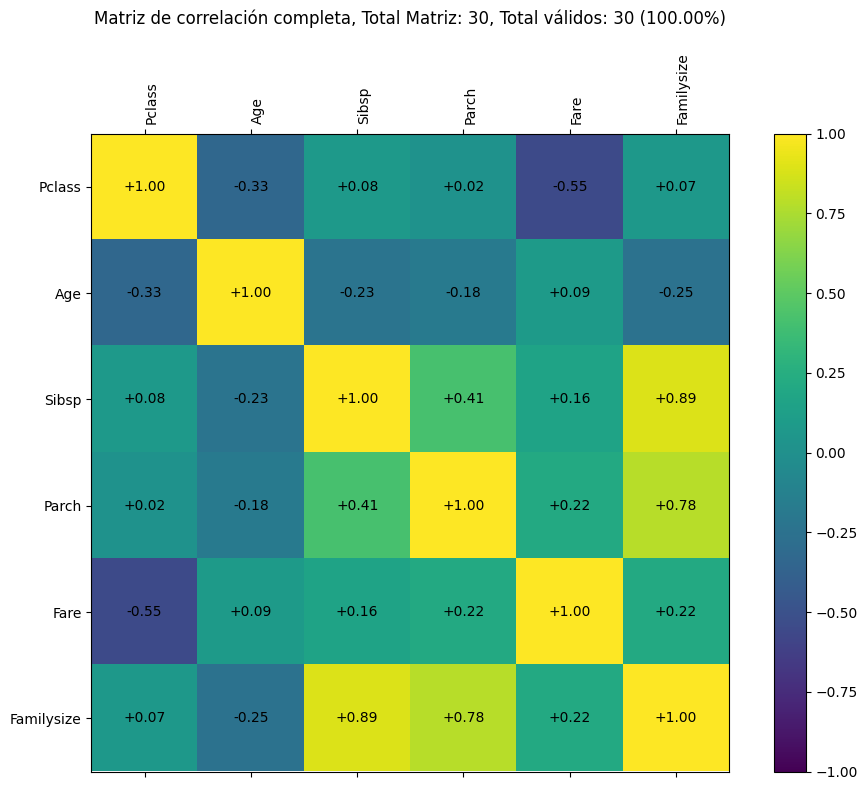

,Pclass,Age,Sibsp,Parch,Fare,Familysize
Pclass,1.00,-0.33,0.08,0.02,-0.55,0.07
Age,-0.33,1.00,-0.23,-0.18,0.09,-0.25
Sibsp,0.08,-0.23,1.00,0.41,0.16,0.89
Parch,0.02,-0.18,0.41,1.00,0.22,0.78
Fare,-0.55,0.09,0.16,0.22,1.00,0.22
Familysize,0.07,-0.25,0.89,0.78,0.22,1.00


'ℹ️ TITANIC DATA ORIGINAL TRAIN - Matriz de Correlación, Type: STRONG'

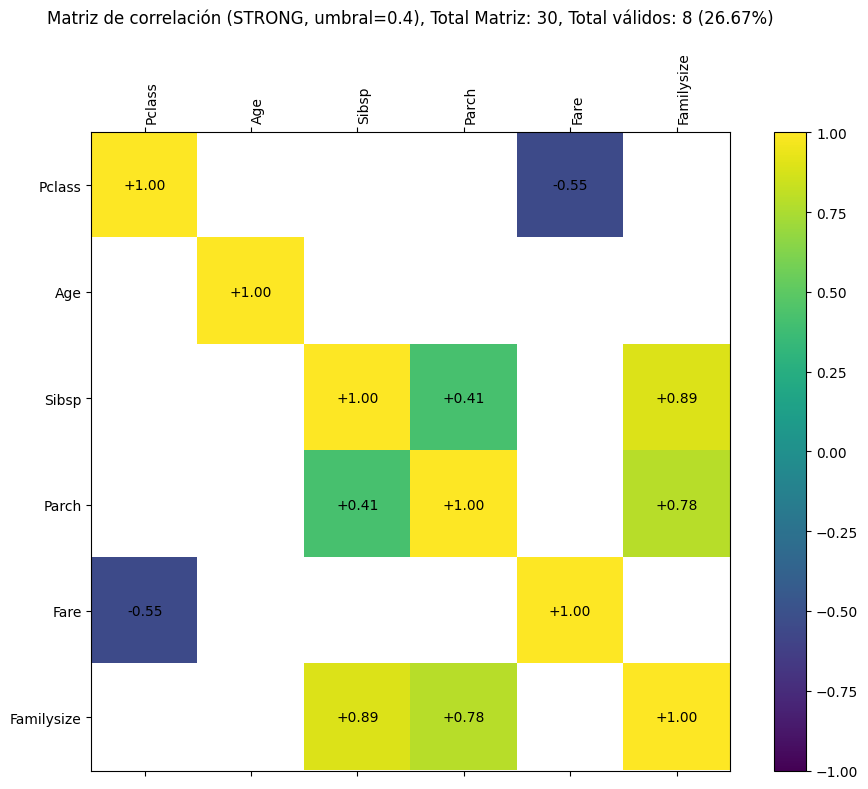

'ℹ️ TITANIC DATA ORIGINAL TRAIN - Matriz de Correlación, Type: WEAK'

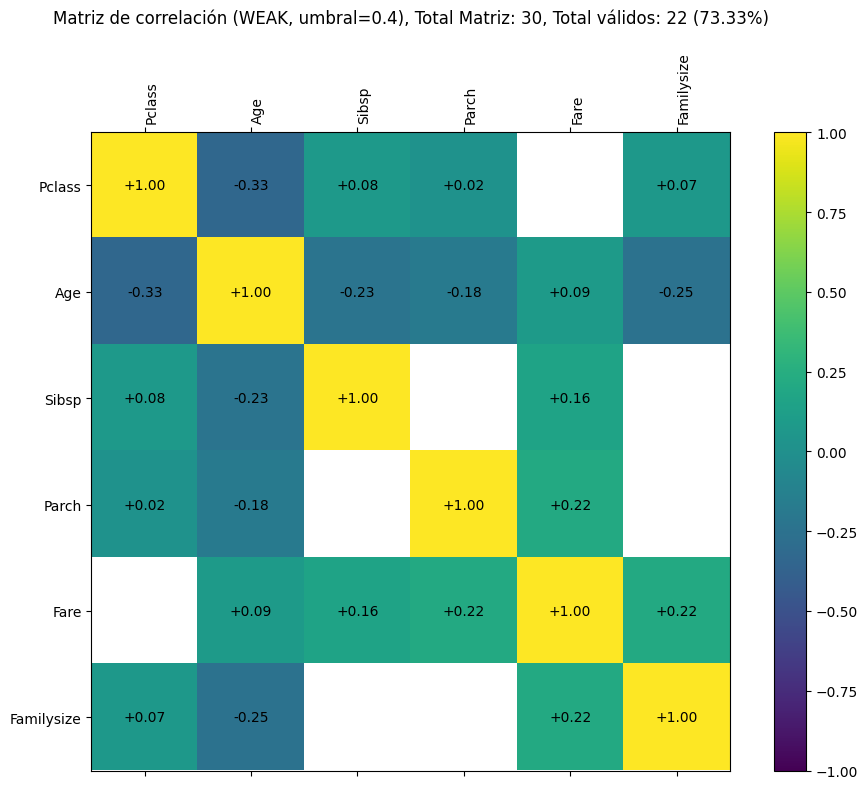

┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = True - PCA = False - Features(11): Pclass, Age, Sibsp, Parch, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard │
└──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = True - PCA = False - Features(11): Pclass, Age, Sibsp, Parch, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               891 non-null    float64
 1   Age                  891 non-null    float64
 2   Sibsp                891 non-null    float64
 3   Parch                891 non-null    float64
 4   Fare                 891 non-null    float64
 5   EmbarkedCherbourg    891 non-null    float64
 6   EmbarkedQueenstown   891 non-null    float64
 7   EmbarkedSouthampton  891 non-null    float64
 8   SexFemale            891 non-null    float64
 9   SexMale              891 non-null    float64
 10  Familysize           891 non-null    float64
dtypes: float64(11)
memory usage: 76.7 KB


'ℹ️ TITANIC Data - Scaled = True - PCA = False - Features(11): Pclass, Age, Sibsp, Parch, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard: Primeros 5 elementos.'

,Pclass,Age,Sibsp,Parch,Fare,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,0.83,-0.59,0.43,-0.47,-0.50,-0.48,-0.31,0.62,-0.74,0.74,0.06
1,-1.57,0.64,0.43,-0.47,0.79,2.07,-0.31,-1.61,1.36,-1.36,0.06
2,0.83,-0.28,-0.47,-0.47,-0.49,-0.48,-0.31,0.62,1.36,-1.36,-0.56
3,-1.57,0.41,0.43,-0.47,0.42,-0.48,-0.31,0.62,1.36,-1.36,0.06
4,0.83,0.41,-0.47,-0.47,-0.49,-0.48,-0.31,0.62,-0.74,0.74,-0.56


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9450
Precision: 0.9453
Recall: 0.9450
F1 Score: 0.9451
Confusion Matrix:


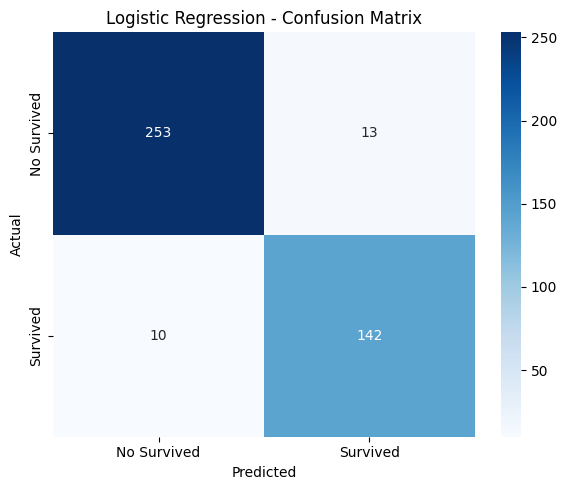

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 18
Accuracy: 0.9330
Precision: 0.9328
Recall: 0.9330
F1 Score: 0.9327
Confusion Matrix:


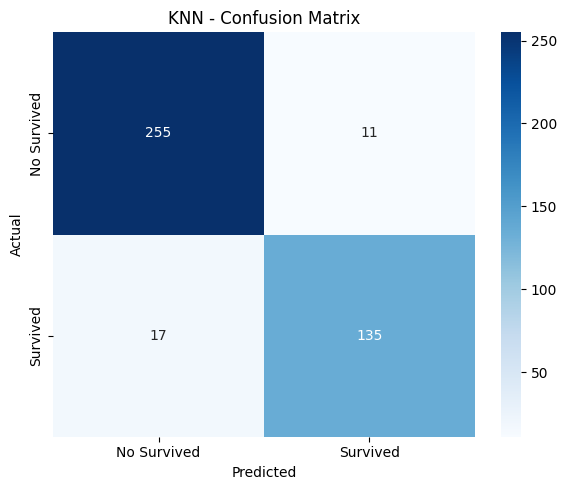

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       266
           1       0.92      0.89      0.91       152

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.93       418
weighted avg       0.93      0.93      0.93       418

┌───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = True - PCA = False - Features(9): Pclass, Age, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard │
└───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = True - PCA = False - Features(9): Pclass, Age, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               891 non-null    float64
 1   Age                  891 non-null    float64
 2   Fare                 891 non-null    float64
 3   EmbarkedCherbourg    891 non-null    float64
 4   EmbarkedQueenstown   891 non-null    float64
 5   EmbarkedSouthampton  891 non-null    float64
 6   SexFemale            891 non-null    float64
 7   SexMale              891 non-null    float64
 8   Familysize           891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


'ℹ️ TITANIC Data - Scaled = True - PCA = False - Features(9): Pclass, Age, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard: Primeros 5 elementos.'

,Pclass,Age,Fare,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,0.83,-0.59,-0.50,-0.48,-0.31,0.62,-0.74,0.74,0.06
1,-1.57,0.64,0.79,2.07,-0.31,-1.61,1.36,-1.36,0.06
2,0.83,-0.28,-0.49,-0.48,-0.31,0.62,1.36,-1.36,-0.56
3,-1.57,0.41,0.42,-0.48,-0.31,0.62,1.36,-1.36,0.06
4,0.83,0.41,-0.49,-0.48,-0.31,0.62,-0.74,0.74,-0.56


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9402
Precision: 0.9405
Recall: 0.9402
F1 Score: 0.9403
Confusion Matrix:


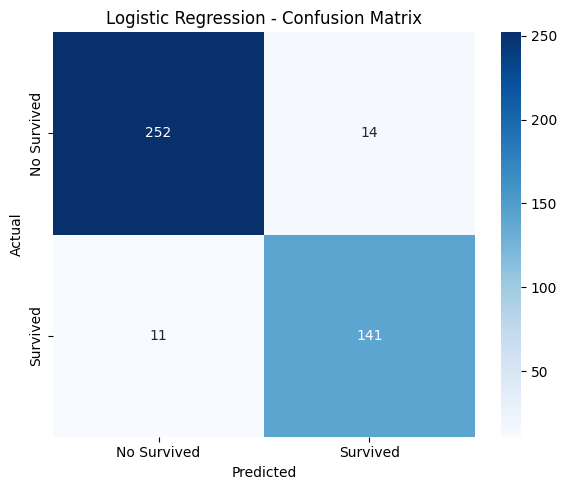

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 23
Accuracy: 0.9258
Precision: 0.9267
Recall: 0.9258
F1 Score: 0.9249
Confusion Matrix:


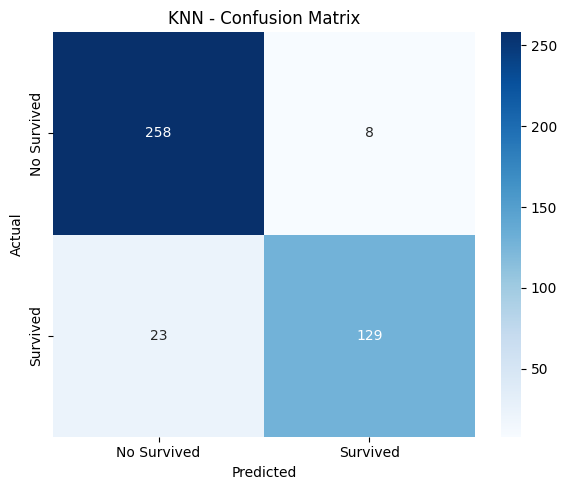

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       266
           1       0.94      0.85      0.89       152

    accuracy                           0.93       418
   macro avg       0.93      0.91      0.92       418
weighted avg       0.93      0.93      0.92       418

┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = True - PCA = False - Features(10): Pclass, Age, Sibsp, Parch, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard │
└────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = True - PCA = False - Features(10): Pclass, Age, Sibsp, Parch, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               891 non-null    float64
 1   Age                  891 non-null    float64
 2   Sibsp                891 non-null    float64
 3   Parch                891 non-null    float64
 4   EmbarkedCherbourg    891 non-null    float64
 5   EmbarkedQueenstown   891 non-null    float64
 6   EmbarkedSouthampton  891 non-null    float64
 7   SexFemale            891 non-null    float64
 8   SexMale              891 non-null    float64
 9   Familysize           891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


'ℹ️ TITANIC Data - Scaled = True - PCA = False - Features(10): Pclass, Age, Sibsp, Parch, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard: Primeros 5 elementos.'

,Pclass,Age,Sibsp,Parch,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,0.83,-0.59,0.43,-0.47,-0.48,-0.31,0.62,-0.74,0.74,0.06
1,-1.57,0.64,0.43,-0.47,2.07,-0.31,-1.61,1.36,-1.36,0.06
2,0.83,-0.28,-0.47,-0.47,-0.48,-0.31,0.62,1.36,-1.36,-0.56
3,-1.57,0.41,0.43,-0.47,-0.48,-0.31,0.62,1.36,-1.36,0.06
4,0.83,0.41,-0.47,-0.47,-0.48,-0.31,0.62,-0.74,0.74,-0.56


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9426
Precision: 0.9431
Recall: 0.9426
F1 Score: 0.9427
Confusion Matrix:


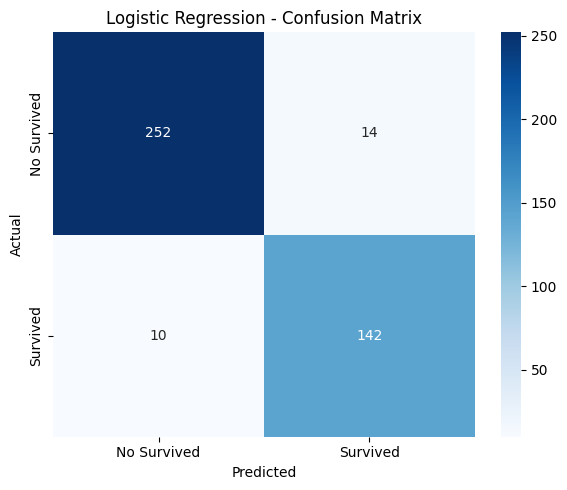

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 18
Accuracy: 0.9426
Precision: 0.9425
Recall: 0.9426
F1 Score: 0.9423
Confusion Matrix:


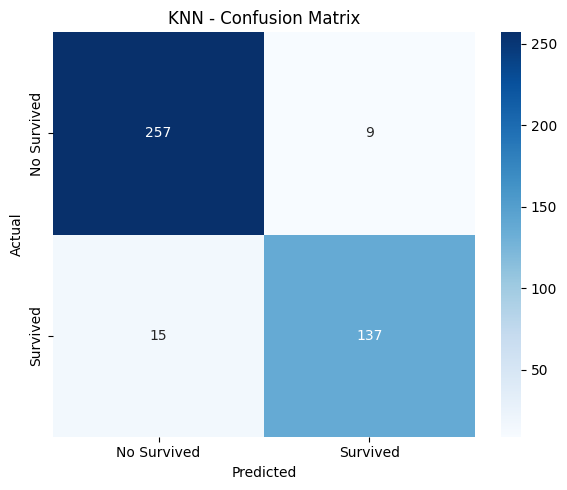

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       266
           1       0.94      0.90      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.93      0.94       418
weighted avg       0.94      0.94      0.94       418

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = True - PCA = False - Features(8): Pclass, Age, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = True - PCA = False - Features(8): Pclass, Age, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               891 non-null    float64
 1   Age                  891 non-null    float64
 2   EmbarkedCherbourg    891 non-null    float64
 3   EmbarkedQueenstown   891 non-null    float64
 4   EmbarkedSouthampton  891 non-null    float64
 5   SexFemale            891 non-null    float64
 6   SexMale              891 non-null    float64
 7   Familysize           891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


'ℹ️ TITANIC Data - Scaled = True - PCA = False - Features(8): Pclass, Age, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: Standard: Primeros 5 elementos.'

,Pclass,Age,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,0.83,-0.59,-0.48,-0.31,0.62,-0.74,0.74,0.06
1,-1.57,0.64,2.07,-0.31,-1.61,1.36,-1.36,0.06
2,0.83,-0.28,-0.48,-0.31,0.62,1.36,-1.36,-0.56
3,-1.57,0.41,-0.48,-0.31,0.62,1.36,-1.36,0.06
4,0.83,0.41,-0.48,-0.31,0.62,-0.74,0.74,-0.56


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9402
Precision: 0.9405
Recall: 0.9402
F1 Score: 0.9403
Confusion Matrix:


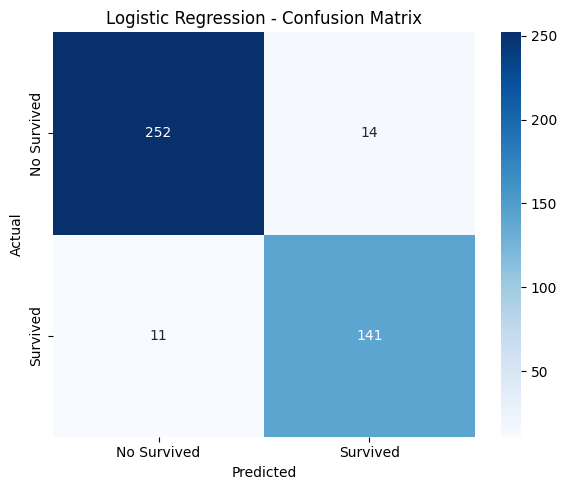

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 29
Accuracy: 0.9330
Precision: 0.9356
Recall: 0.9330
F1 Score: 0.9319
Confusion Matrix:


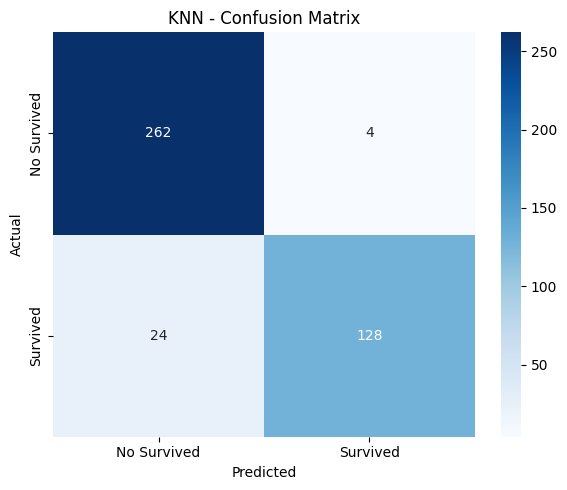

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       266
           1       0.97      0.84      0.90       152

    accuracy                           0.93       418
   macro avg       0.94      0.91      0.93       418
weighted avg       0.94      0.93      0.93       418

┌───────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = False - PCA = True - Features(7): PC1, PC2, PC3, PC4, PC5, PC6, PC7, Scaler: None │
└───────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = False - PCA = True - Features(7): PC1, PC2, PC3, PC4, PC5, PC6, PC7, Scaler: None ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     891 non-null    float64
 1   PC2     891 non-null    float64
 2   PC3     891 non-null    float64
 3   PC4     891 non-null    float64
 4   PC5     891 non-null    float64
 5   PC6     891 non-null    float64
 6   PC7     891 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB


'ℹ️ TITANIC Data - Scaled = False - PCA = True - Features(7): PC1, PC2, PC3, PC4, PC5, PC6, PC7, Scaler: None: Primeros 5 elementos.'

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.67,1.56,0.06,-0.35,-0.42,-0.22,-0.48
1,1.41,-3.30,-0.29,-0.16,-0.41,0.50,-1.04
2,0.16,0.03,1.14,1.99,-0.74,0.15,-0.23
3,1.11,-0.89,-0.68,1.91,0.41,-0.31,-0.94
4,-1.53,0.95,-0.12,0.15,-0.05,0.34,0.07


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9498
Precision: 0.9504
Recall: 0.9498
F1 Score: 0.9499
Confusion Matrix:


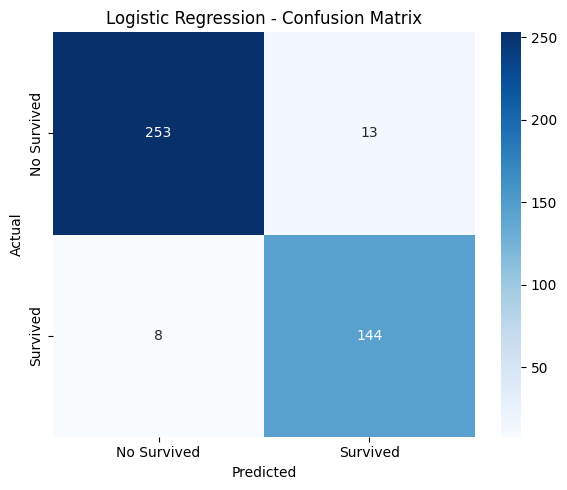

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.95      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 29
Accuracy: 0.9545
Precision: 0.9545
Recall: 0.9545
F1 Score: 0.9544
Confusion Matrix:


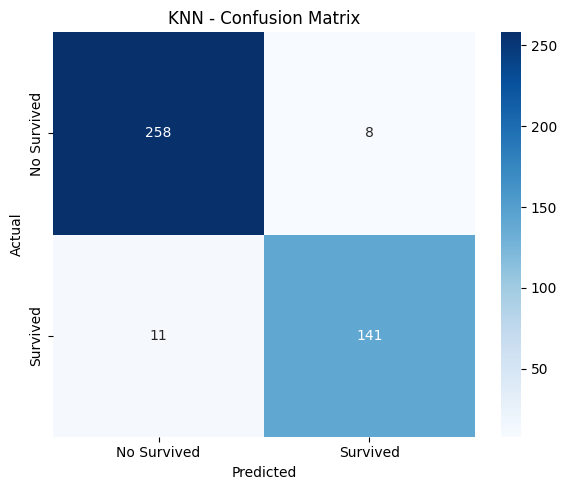

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       266
           1       0.95      0.93      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = False - PCA = True - Features(6): PC1, PC2, PC3, PC4, PC5, PC6, Scaler: None │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = False - PCA = True - Features(6): PC1, PC2, PC3, PC4, PC5, PC6, Scaler: None ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     891 non-null    float64
 1   PC2     891 non-null    float64
 2   PC3     891 non-null    float64
 3   PC4     891 non-null    float64
 4   PC5     891 non-null    float64
 5   PC6     891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


'ℹ️ TITANIC Data - Scaled = False - PCA = True - Features(6): PC1, PC2, PC3, PC4, PC5, PC6, Scaler: None: Primeros 5 elementos.'

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.59,-0.38,0.07,-0.61,-0.16,-0.08
1,3.44,1.18,-0.07,0.11,-0.73,0.40
2,0.40,-1.80,0.09,0.90,-1.10,-0.15
3,1.58,-0.85,-1.50,1.11,0.02,-0.30
4,-1.64,0.16,-0.08,0.30,-0.27,0.23


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9474
Precision: 0.9474
Recall: 0.9474
F1 Score: 0.9474
Confusion Matrix:


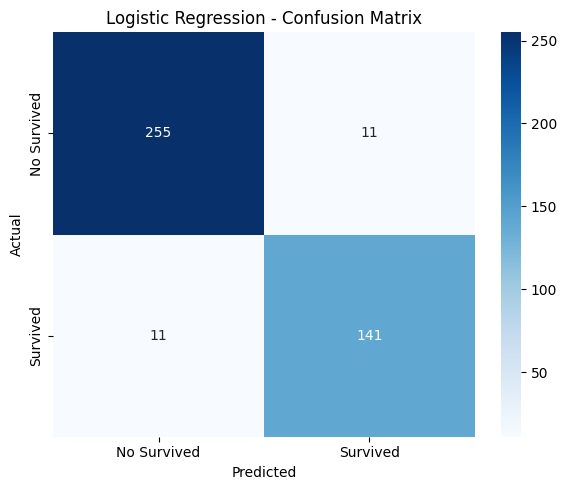

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       266
           1       0.93      0.93      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.95      0.95       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 30
Accuracy: 0.9378
Precision: 0.9398
Recall: 0.9378
F1 Score: 0.9369
Confusion Matrix:


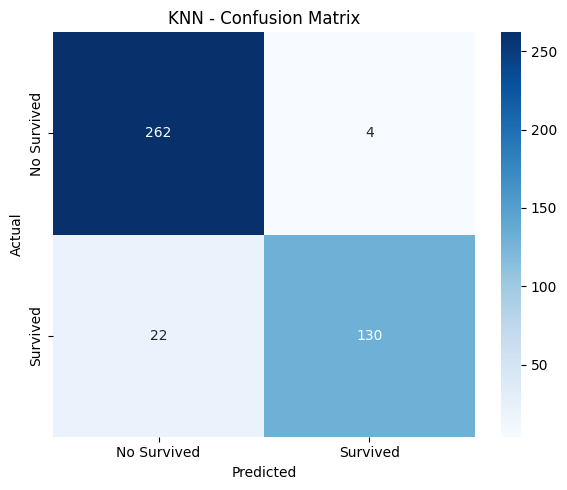

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       266
           1       0.97      0.86      0.91       152

    accuracy                           0.94       418
   macro avg       0.95      0.92      0.93       418
weighted avg       0.94      0.94      0.94       418

┌───────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = False - PCA = True - Features(7): PC1, PC2, PC3, PC4, PC5, PC6, PC7, Scaler: None │
└───────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = False - PCA = True - Features(7): PC1, PC2, PC3, PC4, PC5, PC6, PC7, Scaler: None ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     891 non-null    float64
 1   PC2     891 non-null    float64
 2   PC3     891 non-null    float64
 3   PC4     891 non-null    float64
 4   PC5     891 non-null    float64
 5   PC6     891 non-null    float64
 6   PC7     891 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB


'ℹ️ TITANIC Data - Scaled = False - PCA = True - Features(7): PC1, PC2, PC3, PC4, PC5, PC6, PC7, Scaler: None: Primeros 5 elementos.'

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.32,1.53,-0.45,0.27,-0.51,-0.38,0.36
1,0.70,-3.26,0.24,-1.38,-0.09,-0.78,0.51
2,0.35,-0.46,1.45,1.53,-0.83,0.13,0.65
3,0.85,-0.86,2.10,-0.12,0.47,-1.15,-0.08
4,-1.28,1.12,0.10,0.27,-0.07,0.41,0.51


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9426
Precision: 0.9431
Recall: 0.9426
F1 Score: 0.9427
Confusion Matrix:


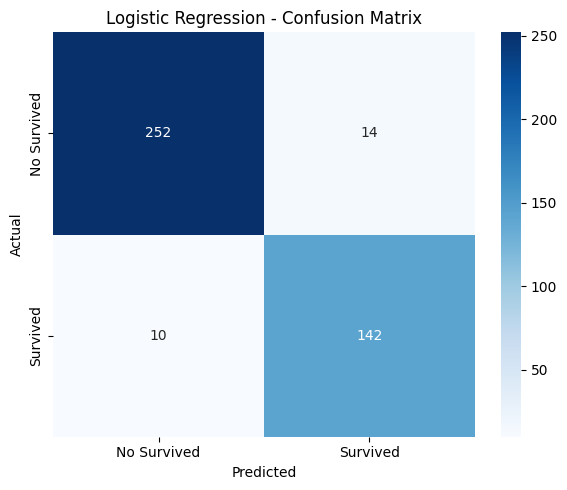

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 19
Accuracy: 0.9450
Precision: 0.9449
Recall: 0.9450
F1 Score: 0.9448
Confusion Matrix:


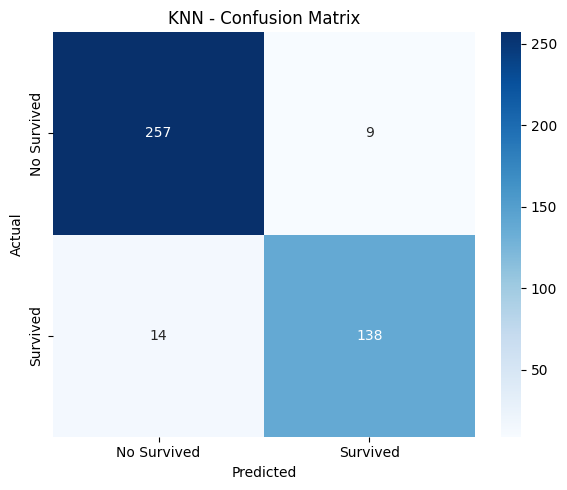

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       266
           1       0.94      0.91      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = False - PCA = True - Features(6): PC1, PC2, PC3, PC4, PC5, PC6, Scaler: None │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = False - PCA = True - Features(6): PC1, PC2, PC3, PC4, PC5, PC6, Scaler: None ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     891 non-null    float64
 1   PC2     891 non-null    float64
 2   PC3     891 non-null    float64
 3   PC4     891 non-null    float64
 4   PC5     891 non-null    float64
 5   PC6     891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


'ℹ️ TITANIC Data - Scaled = False - PCA = True - Features(6): PC1, PC2, PC3, PC4, PC5, PC6, Scaler: None: Primeros 5 elementos.'

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.39,0.53,0.56,-0.47,-0.26,0.10
1,-3.06,-1.53,-1.27,-0.48,0.05,0.04
2,-0.94,1.52,-0.06,0.64,-1.26,0.53
3,-1.39,1.03,-1.73,0.75,0.14,-0.66
4,1.53,0.03,0.08,0.31,-0.38,0.61


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9402
Precision: 0.9405
Recall: 0.9402
F1 Score: 0.9403
Confusion Matrix:


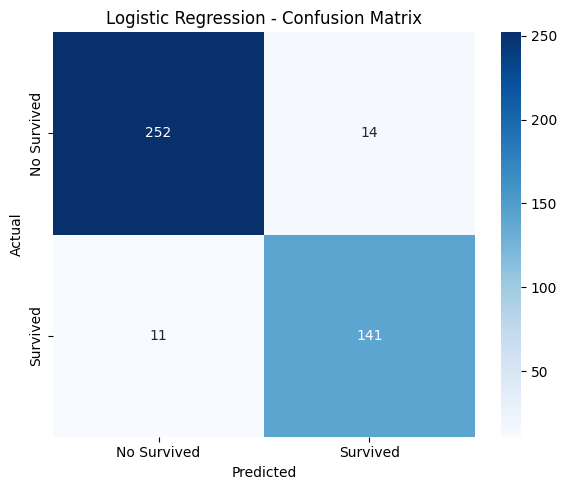

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 15
Accuracy: 0.9354
Precision: 0.9361
Recall: 0.9354
F1 Score: 0.9347
Confusion Matrix:


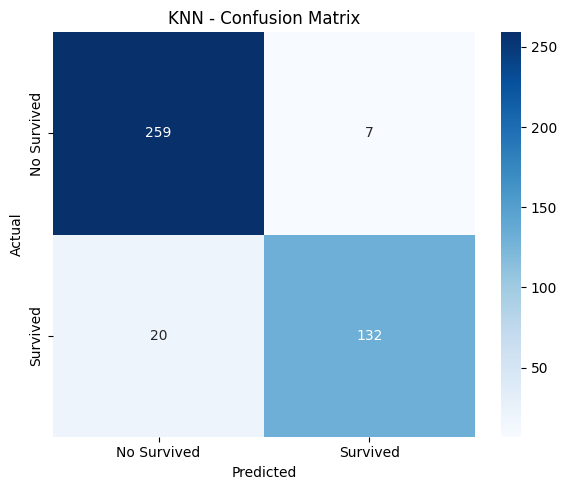

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       266
           1       0.95      0.87      0.91       152

    accuracy                           0.94       418
   macro avg       0.94      0.92      0.93       418
weighted avg       0.94      0.94      0.93       418

┌───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = False - PCA = False - Features(11): Pclass, Age, Sibsp, Parch, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None │
└───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = False - PCA = False - Features(11): Pclass, Age, Sibsp, Parch, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               891 non-null    int64  
 1   Age                  891 non-null    float64
 2   Sibsp                891 non-null    int64  
 3   Parch                891 non-null    int64  
 4   Fare                 891 non-null    float64
 5   EmbarkedCherbourg    891 non-null    boolean
 6   EmbarkedQueenstown   891 non-null    boolean
 7   EmbarkedSouthampton  891 non-null    boolean
 8   SexFemale            891 non-null    boolean
 9   SexMale              891 non-null    boolean
 10  Familysize           891 non-null    int64  
dtypes: boolean(5), float64(2), int64(4)
memory usage: 50.6 KB


'ℹ️ TITANIC Data - Scaled = False - PCA = False - Features(11): Pclass, Age, Sibsp, Parch, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None: Primeros 5 elementos.'

,Pclass,Age,Sibsp,Parch,Fare,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,3,22.00,1,0,7.25,False,False,True,False,True,2
1,1,38.00,1,0,71.28,True,False,False,True,False,2
2,3,26.00,0,0,7.92,False,False,True,True,False,1
3,1,35.00,1,0,53.10,False,False,True,True,False,2
4,3,35.00,0,0,8.05,False,False,True,False,True,1


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9498
Precision: 0.9504
Recall: 0.9498
F1 Score: 0.9499
Confusion Matrix:


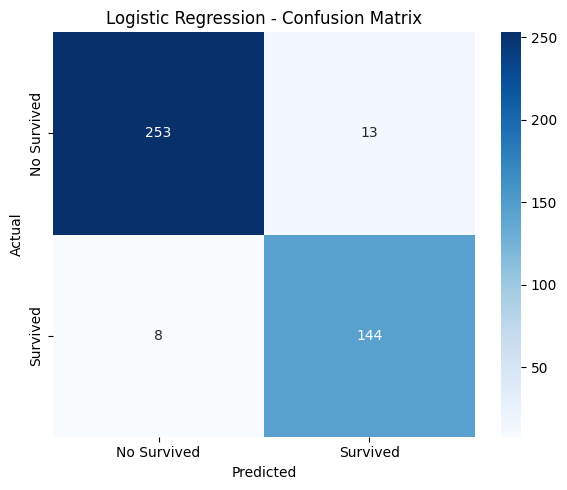

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.95      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 7
Accuracy: 0.6986
Precision: 0.6969
Recall: 0.6986
F1 Score: 0.6977
Confusion Matrix:


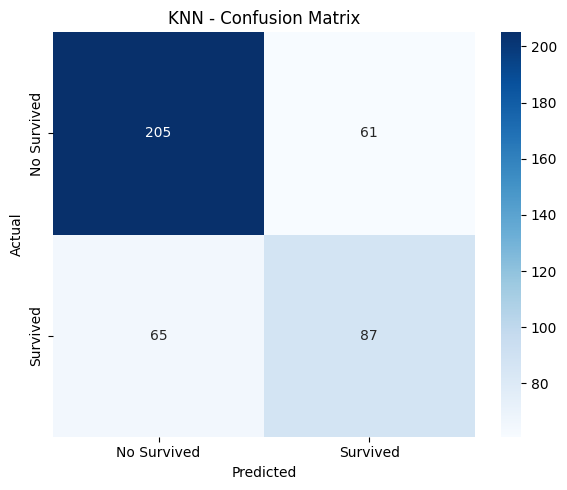

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       266
           1       0.59      0.57      0.58       152

    accuracy                           0.70       418
   macro avg       0.67      0.67      0.67       418
weighted avg       0.70      0.70      0.70       418

┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = False - PCA = False - Features(9): Pclass, Age, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None │
└────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = False - PCA = False - Features(9): Pclass, Age, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               891 non-null    int64  
 1   Age                  891 non-null    float64
 2   Fare                 891 non-null    float64
 3   EmbarkedCherbourg    891 non-null    boolean
 4   EmbarkedQueenstown   891 non-null    boolean
 5   EmbarkedSouthampton  891 non-null    boolean
 6   SexFemale            891 non-null    boolean
 7   SexMale              891 non-null    boolean
 8   Familysize           891 non-null    int64  
dtypes: boolean(5), float64(2), int64(2)
memory usage: 36.7 KB


'ℹ️ TITANIC Data - Scaled = False - PCA = False - Features(9): Pclass, Age, Fare, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None: Primeros 5 elementos.'

,Pclass,Age,Fare,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,3,22.00,7.25,False,False,True,False,True,2
1,1,38.00,71.28,True,False,False,True,False,2
2,3,26.00,7.92,False,False,True,True,False,1
3,1,35.00,53.10,False,False,True,True,False,2
4,3,35.00,8.05,False,False,True,False,True,1


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9402
Precision: 0.9405
Recall: 0.9402
F1 Score: 0.9403
Confusion Matrix:


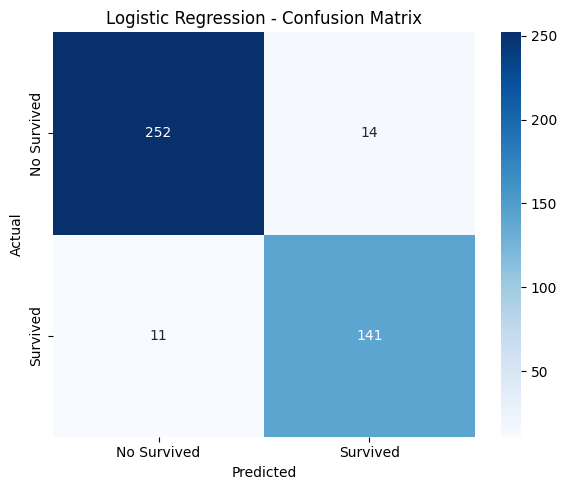

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 8
Accuracy: 0.7081
Precision: 0.7020
Recall: 0.7081
F1 Score: 0.7037
Confusion Matrix:


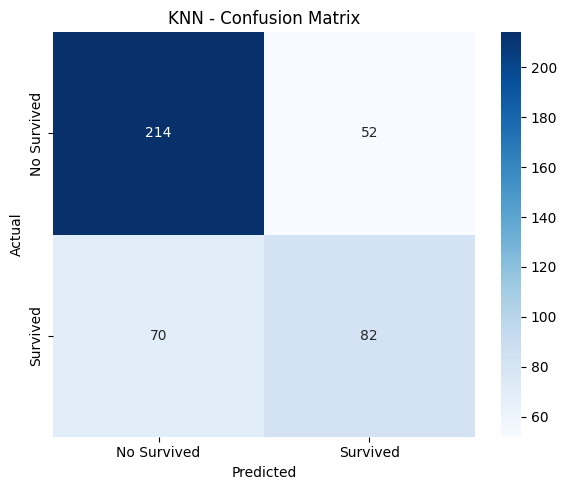

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       266
           1       0.61      0.54      0.57       152

    accuracy                           0.71       418
   macro avg       0.68      0.67      0.68       418
weighted avg       0.70      0.71      0.70       418

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = False - PCA = False - Features(10): Pclass, Age, Sibsp, Parch, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = False - PCA = False - Features(10): Pclass, Age, Sibsp, Parch, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               891 non-null    int64  
 1   Age                  891 non-null    float64
 2   Sibsp                891 non-null    int64  
 3   Parch                891 non-null    int64  
 4   EmbarkedCherbourg    891 non-null    boolean
 5   EmbarkedQueenstown   891 non-null    boolean
 6   EmbarkedSouthampton  891 non-null    boolean
 7   SexFemale            891 non-null    boolean
 8   SexMale              891 non-null    boolean
 9   Familysize           891 non-null    int64  
dtypes: boolean(5), float64(1), int64(4)
memory usage: 43.6 KB


'ℹ️ TITANIC Data - Scaled = False - PCA = False - Features(10): Pclass, Age, Sibsp, Parch, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None: Primeros 5 elementos.'

,Pclass,Age,Sibsp,Parch,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,3,22.00,1,0,False,False,True,False,True,2
1,1,38.00,1,0,True,False,False,True,False,2
2,3,26.00,0,0,False,False,True,True,False,1
3,1,35.00,1,0,False,False,True,True,False,2
4,3,35.00,0,0,False,False,True,False,True,1


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9402
Precision: 0.9405
Recall: 0.9402
F1 Score: 0.9403
Confusion Matrix:


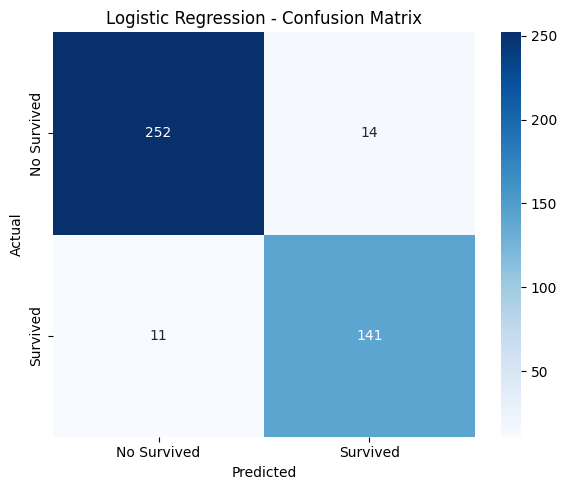

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 8
Accuracy: 0.8158
Precision: 0.8163
Recall: 0.8158
F1 Score: 0.8095
Confusion Matrix:


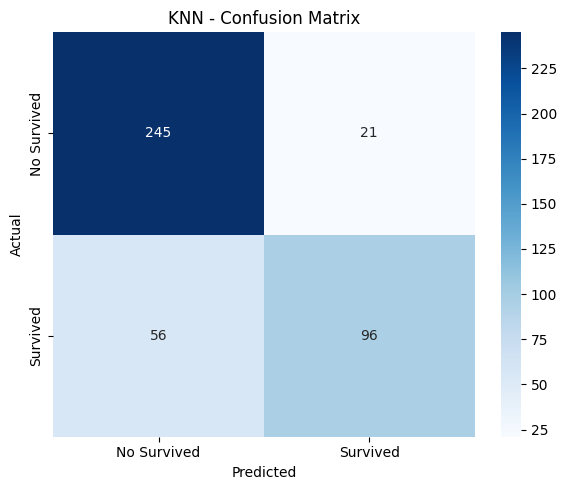

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       266
           1       0.82      0.63      0.71       152

    accuracy                           0.82       418
   macro avg       0.82      0.78      0.79       418
weighted avg       0.82      0.82      0.81       418

┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TITANIC Data - Scaled = False - PCA = False - Features(8): Pclass, Age, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None │
└──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO TITANIC Data - Scaled = False - PCA = False - Features(8): Pclass, Age, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               891 non-null    int64  
 1   Age                  891 non-null    float64
 2   EmbarkedCherbourg    891 non-null    boolean
 3   EmbarkedQueenstown   891 non-null    boolean
 4   EmbarkedSouthampton  891 non-null    boolean
 5   SexFemale            891 non-null    boolean
 6   SexMale              891 non-null    boolean
 7   Familysize           891 non-null    int64  
dtypes: boolean(5), float64(1), int64(2)
memory usage: 29.7 KB


'ℹ️ TITANIC Data - Scaled = False - PCA = False - Features(8): Pclass, Age, EmbarkedCherbourg, EmbarkedQueenstown, EmbarkedSouthampton, SexFemale, SexMale, Familysize, Scaler: None: Primeros 5 elementos.'

,Pclass,Age,EmbarkedCherbourg,EmbarkedQueenstown,EmbarkedSouthampton,SexFemale,SexMale,Familysize
0,3,22.00,False,False,True,False,True,2
1,1,38.00,True,False,False,True,False,2
2,3,26.00,False,False,True,True,False,1
3,1,35.00,False,False,True,True,False,2
4,3,35.00,False,False,True,False,True,1


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                    RESULTADOS REGRESIÓN LOGÍSTICA                                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Accuracy: 0.9402
Precision: 0.9405
Recall: 0.9402
F1 Score: 0.9403
Confusion Matrix:


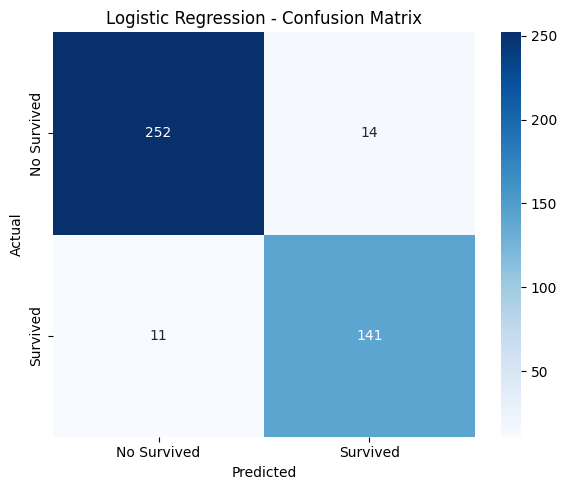

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                            RESULTADOS KNN                                            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Best K: 9
Accuracy: 0.8230
Precision: 0.8214
Recall: 0.8230
F1 Score: 0.8219
Confusion Matrix:


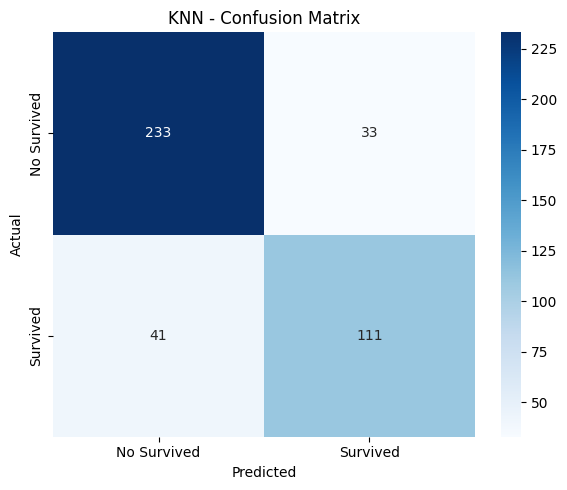

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       266
           1       0.77      0.73      0.75       152

    accuracy                           0.82       418
   macro avg       0.81      0.80      0.81       418
weighted avg       0.82      0.82      0.82       418



'ℹ️ Métricas de todos los splits evaluados: Primeros 10000 elementos.'

,Index,Type,Scaler,LR_Accuracy,LR_Precision,LR_Recall,LR_F1,KNN_BestK,KNN_Accuracy,KNN_Precision,KNN_Recall,KNN_F1
0,1,SCALED,Standard,0.94,0.95,0.94,0.95,18,0.93,0.93,0.93,0.93
1,2,SCALED,Standard,0.94,0.94,0.94,0.94,23,0.93,0.93,0.93,0.92
2,3,SCALED,Standard,0.94,0.94,0.94,0.94,18,0.94,0.94,0.94,0.94
3,4,SCALED,Standard,0.94,0.94,0.94,0.94,29,0.93,0.94,0.93,0.93
4,5,PCA,None,0.95,0.95,0.95,0.95,29,0.95,0.95,0.95,0.95
5,6,PCA,None,0.95,0.95,0.95,0.95,30,0.94,0.94,0.94,0.94
6,7,PCA,None,0.94,0.94,0.94,0.94,19,0.94,0.94,0.94,0.94
7,8,PCA,None,0.94,0.94,0.94,0.94,15,0.94,0.94,0.94,0.93
8,9,RAW,None,0.95,0.95,0.95,0.95,7,0.70,0.70,0.70,0.70
9,10,RAW,None,0.94,0.94,0.94,0.94,8,0.71,0.70,0.71,0.70


In [3]:
DOWNLOADS_DIR = "Temp"
TITANIC_TEST_DATA_URL = "https://github.com/UIDE-Tareas/6-Herramientas-Data-Science-Tarea1/raw/refs/heads/main/Datasets/TitanicTest.csv"
TITANIC_TEST_GENDER_SUB_DATA_URL = "https://github.com/UIDE-Tareas/6-Herramientas-Data-Science-Tarea1/raw/refs/heads/main/Datasets/TitanicGenderSub.csv"
TITANIC_TRAIN_DATA_URL = "https://github.com/UIDE-Tareas/6-Herramientas-Data-Science-Tarea1/raw/refs/heads/main/Datasets/TitanicTrain.csv"
TITANIC_TEST_FILENAME = os.path.join(DOWNLOADS_DIR, "TitanicTest.csv")
TITANIC_TRAIN_FILENAME = os.path.join(DOWNLOADS_DIR, "TitanicTrain.csv")
TITANIC_TEST_GENDER_SUB_FILENAME = os.path.join(DOWNLOADS_DIR, "TitanicGenderSub.csv")


# Carga y preprocesa el dataset de Titanic, retornando el split Train/Test. 
def LoadTitanicDatasetSplit(toDrop: list[str]=[])-> DatasetSplit:
    toDrop = [c for c in toDrop if c != "Survived"]
    DownloadFile(TITANIC_TEST_DATA_URL, TITANIC_TEST_FILENAME, printInfo=False)
    DownloadFile(TITANIC_TRAIN_DATA_URL, TITANIC_TRAIN_FILENAME, printInfo=False)
    DownloadFile(TITANIC_TEST_GENDER_SUB_DATA_URL, TITANIC_TEST_GENDER_SUB_FILENAME, printInfo=False)
    dfTrain = pd.read_csv(TITANIC_TRAIN_FILENAME)
    dfTest = pd.read_csv(TITANIC_TEST_FILENAME)
    dfTestGenderSub = pd.read_csv(TITANIC_TEST_GENDER_SUB_FILENAME)

    toDiscard = ["Cabin", "PassengerId", "Ticket", "Name"]
    dfTrain = dfTrain.drop(columns=toDiscard)
    dfTest  = dfTest.drop(columns=toDiscard)

    dtypeMap = {
        "Survived": "int64",
        "Pclass": "int64",
        "Sex": "string",
        "Age": "float64",
        "SibSp": "int64",
        "Parch": "int64",
        "Fare": "float64",
        "Embarked": "string"
    }

    dfTrain = dfTrain.astype(dtypeMap)
    dfTest  = dfTest.astype({col: dtypeMap[col] for col in dfTest.columns})

    mapEmbarked = {
        "S": "Southampton",
        "C": "Cherbourg",
        "Q": "Queenstown"
    }
    dfTrain["Embarked"] = dfTrain["Embarked"].replace(mapEmbarked)
    dfTest["Embarked"]  = dfTest["Embarked"].replace(mapEmbarked)

    dfTrain = pd.get_dummies(dfTrain, columns=["Embarked"], prefix="Embarked")
    dfTest  = pd.get_dummies(dfTest, columns=["Embarked"], prefix="Embarked")

    dfTrain = pd.get_dummies(dfTrain, columns=["Sex"], prefix="Sex", drop_first=False)
    dfTest  = pd.get_dummies(dfTest, columns=["Sex"], prefix="Sex", drop_first=False)

    dfTrain["FamilySize"] = dfTrain["SibSp"] + dfTrain["Parch"] + 1
    dfTest["FamilySize"] = dfTest["SibSp"] + dfTest["Parch"] + 1

    meanAge = dfTrain["Age"].mean()
    dfTrain["Age"] = dfTrain["Age"].fillna(meanAge)
    dfTest["Age"]  = dfTest["Age"].fillna(meanAge)

    meanFare = dfTrain["Fare"].mean()
    dfTrain["Fare"] = dfTrain["Fare"].fillna(meanAge)
    dfTest["Fare"]  = dfTest["Fare"].fillna(meanAge)

    NormalizeColumnNames(dfTrain)
    NormalizeColumnNames(dfTest)

    dfTrain = DropColumns(dfTrain, toDrop, inplace=True)
    dfTest  = DropColumns(dfTest, toDrop, inplace=True)

    XTrain = dfTrain.drop(columns=["Survived"])
    yTrain = dfTrain[["Survived"]].copy()
    XTest  = dfTest
    yTest  = dfTestGenderSub[["Survived"]].copy()
    return DatasetSplit(
        Train=Dataset(X=XTrain, y=yTrain),
        Test=Dataset(X=XTest, y=yTest)
    )

ShowTitleBox("EXPLORACIÓN INICIAL TITANIC DATASET", color=ConsoleColor.MAGENTA, boxLineStyle= TitleBoxLineStyle.BLOCK)
ShowTitleBox("CARGANDO EL DATASET", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
split0 = LoadTitanicDatasetSplit()
ShowTitleBox("INFO DEL DATASET", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
title = "Titanic Dataset Split"
ShowDatasetSplitInfo(split0, title, headQty=10)

ShowTitleBox("MATRIZ DE CORRELACIÓN", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
title = "TITANIC Data original TRAIN"
CORR_UMBRAL = 0.4
_=ShowDfCorrelation(split0.Train.X, title, level=CorrelationType.ALL, showTable=True, figsize=(10,8), annotate=True, umbral=CORR_UMBRAL)
_=ShowDfCorrelation(split0.Train.X, title, level=CorrelationType.STRONG, showTable=False, figsize=(10,8), annotate=True, umbral=CORR_UMBRAL)
_=ShowDfCorrelation(split0.Train.X, title, level=CorrelationType.WEAK, showTable=False, figsize=(10,8), annotate=True, umbral=CORR_UMBRAL)

split1 = ScaleDatasetSplit( LoadTitanicDatasetSplit())
split2 = ScaleDatasetSplit( LoadTitanicDatasetSplit(toDrop=["Sibsp", "Parch"]), CreateScaler(ScalerType.STANDARD))
split3 = ScaleDatasetSplit( LoadTitanicDatasetSplit(toDrop=["Fare"]), StandardScaler())
split4 = ScaleDatasetSplit(LoadTitanicDatasetSplit(toDrop=["Sibsp", "Parch","Fare"]), StandardScaler())

split5 = ApplyPCA(ScaleDatasetSplit( LoadTitanicDatasetSplit()))
split6 = ApplyPCA(ScaleDatasetSplit( LoadTitanicDatasetSplit(toDrop=["Sibsp", "Parch"])))
split7 = ApplyPCA(ScaleDatasetSplit( LoadTitanicDatasetSplit(toDrop=["Fare"])))
split8 = ApplyPCA(ScaleDatasetSplit(LoadTitanicDatasetSplit(toDrop=["Sibsp", "Parch","Fare"])))

split9 = (LoadTitanicDatasetSplit())
split10 = (LoadTitanicDatasetSplit(toDrop=["Sibsp", "Parch"]))
split11 = (LoadTitanicDatasetSplit(toDrop=["Fare"]))
split12 = (LoadTitanicDatasetSplit(toDrop=["Sibsp", "Parch","Fare"]))

splitList = [split1, split2, split3, split4, split5, split6, split7, split8, split9, split10, split11, split12]

EvaluateSplits(splitList)
ShowDfHead(GenerateMetricsTable(splitList), title="Métricas de todos los splits evaluados", headQty=10000)